In [ ]:
#@title Student Information
Name = 'Shreya Pande' #@param {type:"string"}
Login_ID = '' #@param {type:"string"}
SIS_ID = 'value' #@param {type:"string"}

# Problem 1. US Covid Death Counts by States by Time (2 points)

The US CDC maintains a [dataset](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36/data) tracking the US covid death counts by states by time. We would like to use this dataset to extract the (accumulative) total death counts by month for each state and put it into a pandas DataFrame. 

**Requirements**

1. Use this [link](https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD) to downlaod the dataset into your colabe server machine and load it into a pandas DataFrame (i.e., the "original" DataFrame thereafter in this HW). **The downloading of data has to be performed programatically in your notebook, in another word, manually downloading it and then uploading it into your colab notebook is not acceptable**
2. Use the `tot_death` column for the data extraction
3. The result pandas DataFrame should contain the following columns:
 - `state`: the `state` column of the original DataFrame
 - `year`: the year of the `submission_date` column in the original DataFrame
 - `month`: the month of the `submission_date` column in the original DataFrame
 - `tot_death`: the `tot_death` in the original DataFrame
4. For each state for each month, there should be only one row in the result pandas DataFrame that contains the total death counts for that state in that month.  

In [26]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
url = 'https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD'
import pandas as pd
cdc_df_initial = pd.read_csv(url)

In [28]:
cdc_df_initial.head(2)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree


In [29]:
# Keeping only the required columns
cdc_df = cdc_df_initial[["state", "submission_date", "tot_death"]].drop_duplicates()
cdc_df.head(2)

,state,submission_date,tot_death
0,KS,03/11/2021,4851
1,ND,12/01/2021,1907


In [30]:
# Getting the month and year from "submission_date"

In [31]:
cdc_df.dtypes

state              object
submission_date    object
tot_death           int64
dtype: object

In [32]:
#Converting to datetime format
cdc_df['submission_date'] = pd.to_datetime(cdc_df['submission_date'])
cdc_df.dtypes

state                      object
submission_date    datetime64[ns]
tot_death                   int64
dtype: object

In [33]:
#Extracting year and month
cdc_df['year'] = pd.DatetimeIndex(cdc_df['submission_date']).year
cdc_df['month'] = pd.DatetimeIndex(cdc_df['submission_date']).month

In [34]:
cdc_df.head()

,state,submission_date,tot_death,year,month
0,KS,2021-03-11,4851,2021,3
1,ND,2021-12-01,1907,2021,12
2,AS,2022-01-02,0,2022,1
3,AL,2021-11-22,16377,2021,11
4,AK,2022-05-30,1252,2022,5


In [35]:
monthly_state_numbers = cdc_df.groupby(['state', 'month', 'year']).tot_death.max().reset_index(name="sum_death")
print(monthly_state_numbers.state.unique())
print(monthly_state_numbers.state.nunique())
monthly_state_numbers.head(2)

['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'FSM' 'GA' 'GU'
 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO'
 'MP' 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'NYC' 'OH' 'OK'
 'OR' 'PA' 'PR' 'PW' 'RI' 'RMI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT'
 'WA' 'WI' 'WV' 'WY']
60


,state,month,year,sum_death
0,AK,1,2020,0
1,AK,1,2021,308


# Problem 2. Animation of the Death Counts by States by Time (2 points)

Starting with the result pandas DataFrame derived from the Problem 1, generate a choropleth plot that shows the total death counts by state over time.  

**Requirements**

1. The plot has to be generated using the [`plotly.express.choropleth`](https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html) function.
2. The plot should features an animation UI by using the `animation_frame` argument of the plotting function. When the user plays the animation, the animation needs to start from the earliest time and display the death counts for each state month by month in the increasing order of time. 
3. The color range has to be fixed so that the plot won't dynamically change the color range during the animation.

In [48]:
choropleth_df = monthly_state_numbers.copy()

choropleth_df.dtypes

state        object
month         int64
year          int64
sum_death     int64
dtype: object

In [49]:
choropleth_df['month_name'] = choropleth_df['month'].astype(str) + "-" + choropleth_df['year'].astype(str)
choropleth_df.head(2)

,state,month,year,sum_death,month_name
0,AK,1,2020,0,1-2020
1,AK,1,2021,308,1-2021


In [55]:
choropleth_df = choropleth_df.sort_values(by = ['year', 'month', 'state'], ascending = [True, True, True], na_position = 'first')
choropleth_df.head(2)

,state,month,year,sum_death,month_name
0,AK,1,2020,0,1-2020
34,AL,1,2020,0,1-2020


In [56]:
import plotly.graph_objects as go
import plotly.express as px

# create figure
fig = px.choropleth(choropleth_df, locations = 'state', locationmode="USA-states", animation_frame = 'month_name', color='sum_death', 
                    color_continuous_scale='purp', scope="usa")
 
fig.show()

# Problem 3. PCA of Major US Indices (2 points)

1. Generate a seaborn pairplot of the PCA scores of the daily close prices from 2017-01-01 to 2022-11-25 of the four major US financial market indicies: `SP500`, `DOW`, `NASDAQ`, and `RUSSELL2000` (1 point).

2. To retain 99% of the data variability, how many PC comoponents do you need to retain (1 point)?

**Requirements**

1. Use the Yahoo finance API to prepare the data

**Notes**

1. The symbols for the indices in the Yahoo finance API: `SP500` - `^GSPC`, `DOW` - `^DJI`, `NASDAQ` - `^IXIC`, `RUSSELL2000` - `^RUT`

In [57]:
# Install Yahoo Finance APIs
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [58]:
import yfinance as yf
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [59]:
yf_data = yf.download(["^GSPC", "^DJI", "^IXIC", "^RUT"],
  start='2017-01-01',
  end='2022-11-25',
  progress=False, rounding = True)['Close']

In [60]:
yf_data.head()

,^DJI,^GSPC,^IXIC,^RUT
Date,,,,
2017-01-03,19881.76,2257.83,5429.08,1365.49
2017-01-04,19942.16,2270.75,5477.00,1387.95
2017-01-05,19899.29,2269.00,5487.94,1371.94
2017-01-06,19963.80,2276.98,5521.06,1367.28
2017-01-09,19887.38,2268.90,5531.82,1357.49


In [61]:
pca = PCA()

In [62]:
yf_data_centered = yf_data.values

yf_data_centered -= yf_data_centered.mean(axis=0)
yf_data_centered

scores = pca.fit_transform(yf_data_centered)
scores

array([[-8.99180251e+03,  6.67289739e+02,  9.34245072e+01,
         1.48815273e+02],
       [-8.91298846e+03,  6.74975280e+02,  1.10754114e+02,
         1.55510529e+02],
       [-8.94382917e+03,  7.07440615e+02,  9.64693900e+01,
         1.52735185e+02],
       ...,
       [ 5.75324150e+03, -2.13390939e+03, -1.53790541e+02,
        -5.31961348e+00],
       [ 6.17276130e+03, -2.22364735e+03, -1.54593384e+02,
        -1.95832081e+00],
       [ 6.31538604e+03, -2.18231597e+03, -1.59596226e+02,
         1.51028862e-01]])

In [63]:
np.cumsum(pca.explained_variance_ratio_)

array([0.97945265, 0.9993152 , 0.99982109, 1.        ])

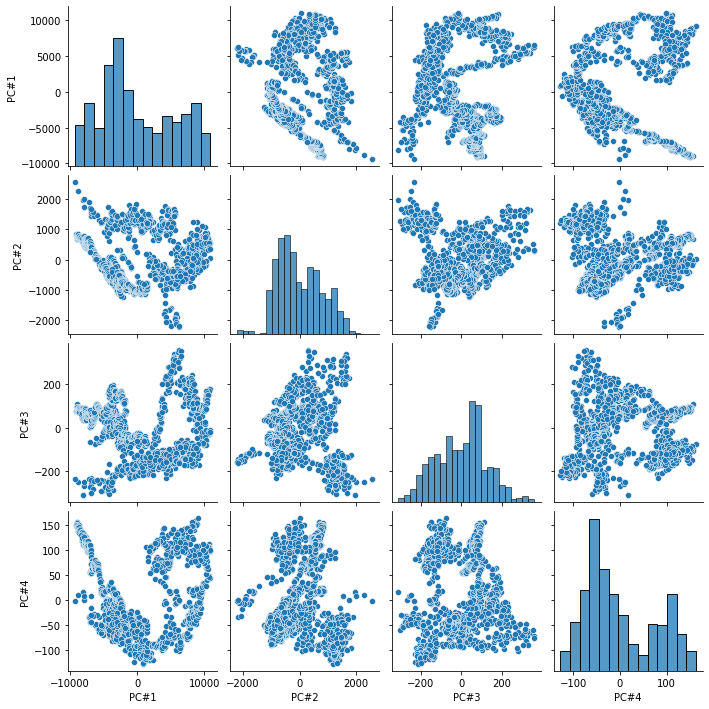

In [64]:
# pairplot with 4 components

score_df = pd.DataFrame(data=scores[:, :4], columns=[f'PC#{axis + 1}' for axis in range(4)])
score_df.index = yf_data.index

sns.pairplot(score_df)

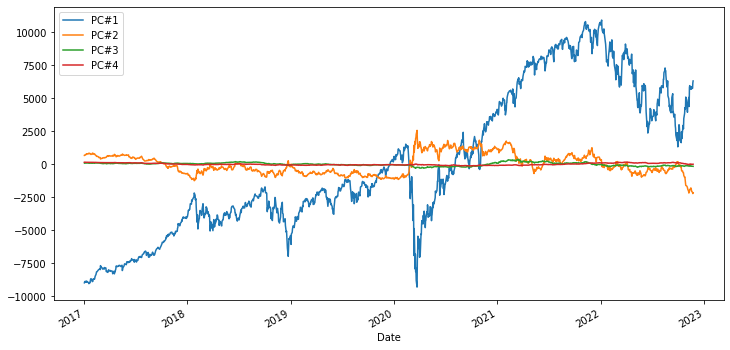

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
score_df.plot(ax=ax)

In [66]:
# 99% of the data variability, how many PC comoponents do you need to retain

def find_dim(pca, var_thres=0.99):
  return np.where(np.cumsum(pca.explained_variance_ratio_) >= var_thres)[0][0] + 1

n_components = find_dim(pca)

print("PC comoponents to be retained: ", n_components)

PC comoponents to be retained:  2


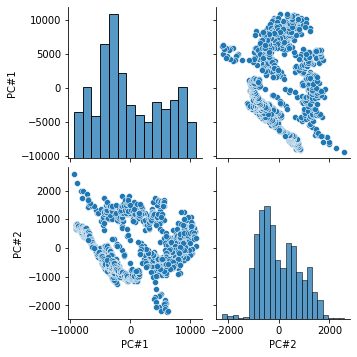

In [67]:
# Pairplot for retained components 

score_df1 = pd.DataFrame(data=scores[:, :n_components], columns=[f'PC#{axis + 1}' for axis in range(n_components)])
score_df1.index = yf_data.index

sns.pairplot(score_df1)

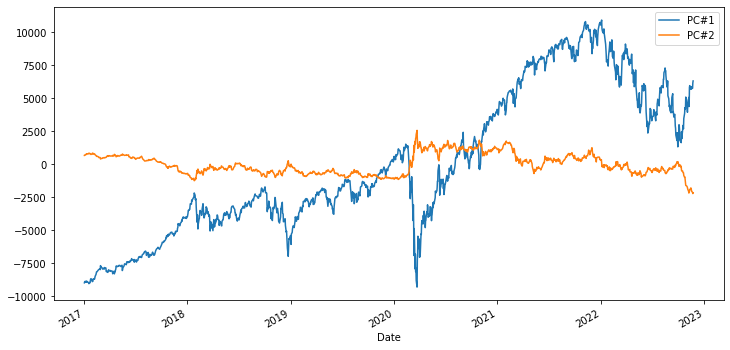

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
score_df1.plot(ax=ax)